In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/ColabData/split_dataset_by_class.zip /content/


In [4]:
!unzip -q split_dataset_by_class.zip -d /content/

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
# Verify GPU Usage
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


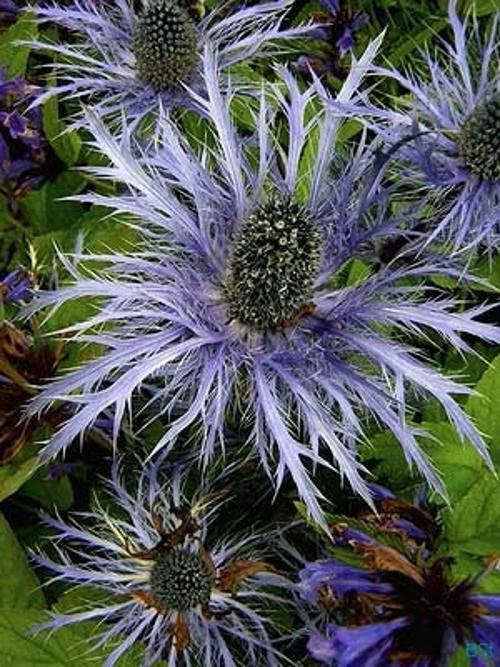

In [ ]:
path = '/content/split_dataset_by_class/train/alpine sea holly'
name = 'image_06969.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [ ]:
img = load_img(fullname, target_size=(299, 299))

In [ ]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F8CE0415690>


array([[[ 64,  43,  86],
        [ 64,  45,  91],
        [ 53,  34,  89],
        ...,
        [ 64,  96,  33],
        [ 69, 102,  33],
        [ 59,  92,  23]],

       [[ 69,  51,  91],
        [ 77,  60, 104],
        [ 73,  56, 108],
        ...,
        [ 74, 104,  44],
        [ 67,  98,  30],
        [ 72, 103,  35]],

       [[ 50,  36,  71],
        [ 62,  50,  90],
        [ 70,  58, 104],
        ...,
        [103, 132,  74],
        [ 66,  97,  30],
        [ 70, 101,  34]],

       ...,

       [[ 72, 101,  19],
        [ 77, 106,  24],
        [ 80, 109,  27],
        ...,
        [ 42,  40,  89],
        [ 46,  48,  99],
        [ 34,  36,  87]],

       [[ 85, 114,  32],
        [ 82, 111,  29],
        [ 77, 106,  24],
        ...,
        [ 42,  44,  82],
        [ 40,  43,  96],
        [ 33,  36,  89]],

       [[ 84, 113,  31],
        [ 73, 102,  20],
        [ 75, 104,  22],
        ...,
        [ 44,  48,  77],
        [ 35,  41,  93],
        [ 32,  38,  90]]], dtype=uint8)
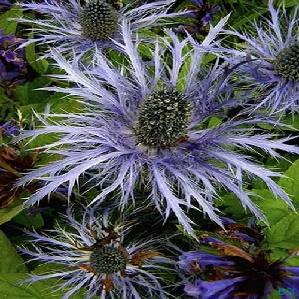

In [ ]:
x = np.array(img)
x

In [ ]:
x.shape

(299, 299, 3)

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

# weights = "imagenet" means we want to use pre-trained network that was trained on imagenet

model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)
X[0]

array([[[-0.4980392 , -0.6627451 , -0.32549018],
        [-0.4980392 , -0.64705884, -0.2862745 ],
        [-0.58431375, -0.73333335, -0.30196077],
        ...,
        [-0.4980392 , -0.24705881, -0.7411765 ],
        [-0.4588235 , -0.19999999, -0.7411765 ],
        [-0.5372549 , -0.27843136, -0.81960785]],

       [[-0.4588235 , -0.6       , -0.2862745 ],
        [-0.3960784 , -0.5294118 , -0.18431371],
        [-0.42745095, -0.56078434, -0.15294117],
        ...,
        [-0.41960782, -0.18431371, -0.654902  ],
        [-0.47450978, -0.23137254, -0.7647059 ],
        [-0.4352941 , -0.19215685, -0.7254902 ]],

       [[-0.60784316, -0.7176471 , -0.44313723],
        [-0.5137255 , -0.60784316, -0.29411763],
        [-0.45098037, -0.54509807, -0.18431371],
        ...,
        [-0.19215685,  0.03529418, -0.41960782],
        [-0.4823529 , -0.23921567, -0.7647059 ],
        [-0.45098037, -0.20784312, -0.73333335]],

       ...,

       [[-0.4352941 , -0.20784312, -0.8509804 ],
        [-0

In [ ]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [ ]:
pred.shape

(1, 1000)

In [ ]:
pred

array([[4.05271167e-05, 1.66380632e-04, 1.31688095e-04, 1.53417845e-04,
        8.31005891e-05, 6.99048833e-05, 3.02771423e-05, 1.27171603e-04,
        7.59672694e-05, 7.88133184e-05, 5.74660837e-04, 2.44893576e-03,
        1.21027976e-03, 8.12520157e-04, 3.72473442e-04, 1.05689403e-04,
        2.01852425e-04, 1.93293177e-04, 1.33470196e-04, 4.22385056e-04,
        1.11140551e-04, 2.78303953e-04, 1.85466080e-04, 6.31275398e-05,
        2.34680614e-04, 1.16997537e-04, 2.21038252e-04, 2.52042460e-04,
        1.20609948e-04, 8.54123646e-05, 7.61230403e-05, 3.96717587e-05,
        2.16247819e-04, 6.72169845e-05, 1.43525263e-04, 7.92078426e-05,
        1.00640558e-04, 1.73202963e-04, 1.24315629e-04, 3.24470428e-04,
        9.09249866e-05, 3.83606442e-04, 6.00307794e-05, 1.14959897e-04,
        1.42699268e-04, 1.09310425e-03, 1.25633334e-04, 2.83642701e-04,
        1.33944166e-04, 5.63255453e-05, 3.45871449e-05, 1.05128762e-04,
        1.70077386e-04, 2.35074971e-04, 2.45290605e-04, 1.130380

In [ ]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


[[('n07730033', 'cardoon', 0.560334),
  ('n11939491', 'daisy', 0.16267258),
  ('n07753275', 'pineapple', 0.03153937),
  ('n03991062', 'pot', 0.021178277),
  ('n02206856', 'bee', 0.013285334)]]

# Reading data with ImageDataGenerator

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/split_dataset_by_class/train',
    target_size=(150, 150),
    batch_size=32
)

Found 6551 images belonging to 102 classes.


In [ ]:
train_ds.class_indices

{'alpine sea holly': 0,
 'anthurium': 1,
 'artichoke': 2,
 'azalea': 3,
 'balloon flower': 4,
 'barbeton daisy': 5,
 'bearded iris': 6,
 'bee balm': 7,
 'bird of paradise': 8,
 'bishop of llandaff': 9,
 'black-eyed susan': 10,
 'blackberry lily': 11,
 'blanket flower': 12,
 'bolero deep blue': 13,
 'bougainvillea': 14,
 'bromelia': 15,
 'buttercup': 16,
 'californian poppy': 17,
 'camellia': 18,
 'canna lily': 19,
 'canterbury bells': 20,
 'cape flower': 21,
 'carnation': 22,
 'cautleya spicata': 23,
 'clematis': 24,
 "colt's foot": 25,
 'columbine': 26,
 'common dandelion': 27,
 'corn poppy': 28,
 'cyclamen': 29,
 'daffodil': 30,
 'desert-rose': 31,
 'fire lily': 32,
 'foxglove': 33,
 'frangipani': 34,
 'fritillary': 35,
 'garden phlox': 36,
 'gaura': 37,
 'gazania': 38,
 'geranium': 39,
 'giant white arum lily': 40,
 'globe flower': 41,
 'globe thistle': 42,
 'grape hyacinth': 43,
 'great masterwort': 44,
 'hard-leaved pocket orchid': 45,
 'hibiscus': 46,
 'hippeastrum': 47,
 'japane

In [ ]:
next(train_ds)

(array([[[[-0.6784314 , -0.2235294 , -0.827451  ],
          [-0.6627451 , -0.21568626, -0.81960785],
          [-0.6313726 , -0.2235294 , -0.8117647 ],
          ...,
          [-0.75686276, -0.5764706 , -0.79607844],
          [-0.9843137 , -0.94509804, -0.99215686],
          [-0.94509804, -0.92941177, -0.9529412 ]],
 
         [[-0.64705884, -0.2235294 , -0.8117647 ],
          [-0.6784314 , -0.25490195, -0.84313726],
          [-0.69411767, -0.2862745 , -0.8666667 ],
          ...,
          [-0.75686276, -0.60784316, -0.96862745],
          [-0.9529412 , -0.92941177, -1.        ],
          [-0.9843137 , -0.96862745, -0.99215686]],
 
         [[-0.5686275 , -0.18431371, -0.7019608 ],
          [-0.58431375, -0.19999999, -0.7176471 ],
          [-0.56078434, -0.17647058, -0.69411767],
          ...,
          [-0.7176471 , -0.5764706 , -0.8901961 ],
          [-0.9529412 , -0.92941177, -0.9843137 ],
          [-0.9764706 , -0.9607843 , -0.9843137 ]],
 
         ...,
 
         [[-

In [ ]:
X, y = next(train_ds)

In [ ]:
X

array([[[[-0.8039216 , -0.73333335, -0.94509804],
         [-0.8117647 , -0.7490196 , -0.9137255 ],
         [-0.94509804, -0.8980392 , -0.99215686],
         ...,
         [-0.73333335, -0.6627451 , -0.8745098 ],
         [-0.7176471 , -0.64705884, -0.85882354],
         [-0.85882354, -0.8039216 , -0.94509804]],

        [[-0.7647059 , -0.69411767, -0.90588236],
         [-0.84313726, -0.78039217, -0.9607843 ],
         [-0.8666667 , -0.8117647 , -0.9529412 ],
         ...,
         [-0.73333335, -0.6627451 , -0.8901961 ],
         [-0.7176471 , -0.64705884, -0.85882354],
         [-0.85882354, -0.8039216 , -0.94509804]],

        [[-0.7254902 , -0.654902  , -0.88235295],
         [-0.8117647 , -0.7411765 , -0.9529412 ],
         [-0.77254903, -0.70980394, -0.8901961 ],
         ...,
         [-0.7254902 , -0.654902  , -0.8980392 ],
         [-0.7490196 , -0.6784314 , -0.8901961 ],
         [-0.85882354, -0.8039216 , -0.94509804]],

        ...,

        [[-0.84313726, -0.7882353 , -0

In [ ]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
X.shape

(32, 150, 150, 3)

In [ ]:
# The same for validation dataset
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/content/split_dataset_by_class/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 819 images belonging to 102 classes.


# Train Xception on smaller images (150×150)

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(102)(vectors)
model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


(32, 102)

In [ ]:
preds[0]

array([ 1.8923414 , -0.13438648,  0.01970644, -0.73691076, -0.4950092 ,
       -0.99963707,  0.6359602 , -0.02086128, -0.01428112,  1.318794  ,
       -0.24528879,  0.13563073,  0.40846747, -0.42475277,  1.0048858 ,
       -1.1078687 , -0.19863161, -0.79413426, -1.0418404 , -1.976497  ,
       -0.42136094, -0.90414727, -1.0420529 , -0.15394166,  0.05844779,
       -0.3454858 , -0.8333085 , -0.24779803,  0.3926285 ,  1.0469613 ,
       -0.15337524,  0.5472106 , -0.05751838, -0.6760396 , -0.40305477,
       -0.5216602 ,  0.61115295,  0.07679478,  1.1031117 , -0.2935167 ,
        0.1857951 , -0.36999816,  0.8865    ,  0.6268265 , -0.16549698,
        0.9574531 , -0.44080886,  0.57548046,  0.56594926, -0.7174359 ,
        0.09568281, -1.1880958 ,  0.8885849 ,  0.2223062 , -0.8240478 ,
        0.88095367,  0.10846685,  0.44771978, -0.78656924,  0.7394976 ,
        0.2861159 , -1.5290436 , -0.00433062, -0.44632602, -0.7922977 ,
        0.91715443, -1.1581202 ,  0.16060045,  0.15437597,  0.50

In [ ]:
type(preds[0])

numpy.ndarray

# Optimize and Compile the model

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [ ]:
# 3625 seg = 60,42 min
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 38s 155ms/step - accuracy: 0.4149 - loss: 3.8288 - val_accuracy: 0.6630 - val_loss: 1.9851
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.7994 - loss: 0.8644 - val_accuracy: 0.6850 - val_loss: 1.8278
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.8844 - loss: 0.4563 - val_accuracy: 0.7082 - val_loss: 2.0054
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.9023 - loss: 0.3931 - val_accuracy: 0.7082 - val_loss: 2.0267
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9300 - loss: 0.2636 - val_accuracy: 0.7411 - val_loss: 1.9088
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.9445 - loss: 0.2126 - val_accuracy: 0.7265 - val_loss: 2.0201
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9559 - loss: 0.1900 - val_accuracy: 0.7595 - val_loss: 2.1752
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.9518 - loss: 0

In [ ]:
history.history['accuracy']

[0.5448023080825806,
 0.8041520118713379,
 0.8751335740089417,
 0.8971149325370789,
 0.9320714473724365,
 0.9415356516838074,
 0.9447412490844727,
 0.9456571340560913,
 0.9523736834526062,
 0.9444359540939331]

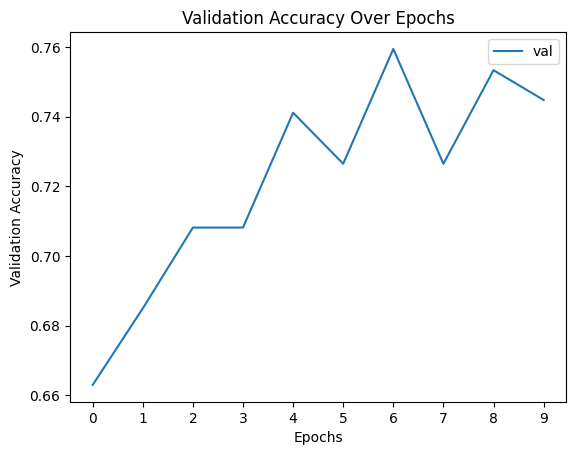

In [ ]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))

# Add labels and title
plt.xlabel("Epochs")  # X-axis label
plt.ylabel("Validation Accuracy")  # Y-axis label
plt.title("Validation Accuracy Over Epochs")  # Graph title

# Add legend
plt.legend()

# Show the plot
plt.show()


# Tunning the Learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(102)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.0766 - loss: 4.3461 - val_accuracy: 0.2613 - val_loss: 3.3442
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.3635 - loss: 3.0138 - val_accuracy: 0.4481 - val_loss: 2.6068
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.5432 - loss: 2.3087 - val_accuracy: 0.5324 - val_loss: 2.1773
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.6417 - loss: 1.8894 - val_accuracy: 0.5861 - val_loss: 1.9057
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.6976 - loss: 1.6104 - val_accuracy: 0.6276 - val_loss: 1.7160
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.7421 - loss: 1.4136 - val_accuracy: 0.6508 - val_loss: 1.5759
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 44s 120ms/step - accuracy: 0.7639 - loss: 1.2786 - val_accuracy: 0.6886 - val_loss: 1.4683
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.7871 - l

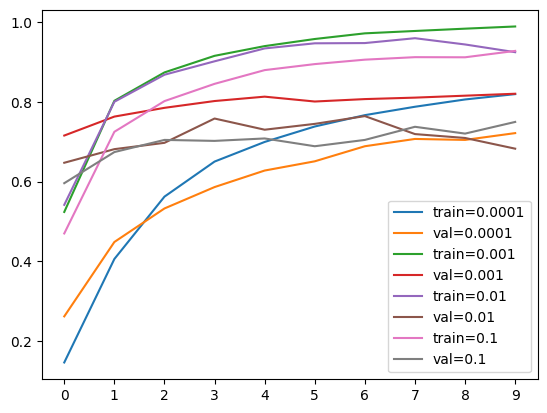

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
# Best performance
learning_rate = 0.001

# Saving the best model only

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3575 - loss: 2.9928

205/205 ━━━━━━━━━━━━━━━━━━━━ 35s 143ms/step - accuracy: 0.3584 - loss: 2.9885 - val_accuracy: 0.6960 - val_loss: 1.2730
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7939 - loss: 0.9234

205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.7940 - loss: 0.9231 - val_accuracy: 0.7473 - val_loss: 1.0242
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8682 - loss: 0.5988

205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.8682 - loss: 0.5987 - val_accuracy: 0.7998 - val_loss: 0.8809
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.9201 - loss: 0.4263 - val_accuracy: 0.7790 - val_loss: 0.8427
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9443 - loss: 0.3228

205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.9443 - loss: 0.3228 - val_accuracy: 0.8059 - val_loss: 0.8010
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9631 - loss: 0.2447 - val_accuracy: 0.7973 - val_loss: 0.7920
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9697 - loss: 0.2015

205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9696 - loss: 0.2015 - val_accuracy: 0.8266 - val_loss: 0.7592
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.9799 - loss: 0.1614 - val_accuracy: 0.8132 - val_loss: 0.7481
Epoch 9/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.9867 - loss: 0.1347 - val_accuracy: 0.8181 - val_loss: 0.7339
Epoch 10/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.9929 - loss: 0.1131 - val_accuracy: 0.8144 - val_loss: 0.7418


# Experimenting with different sizes of inner layer

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(102)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - accuracy: 0.0710 - loss: 4.3289 - val_accuracy: 0.2186 - val_loss: 3.4585
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2749 - loss: 3.1171 - val_accuracy: 0.3663 - val_loss: 2.6717
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.4076 - loss: 2.3930 - val_accuracy: 0.4310 - val_loss: 2.3235
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.4789 - loss: 2.0140 - val_accuracy: 0.4884 - val_loss: 2.1112
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.5152 - loss: 1.8417 - val_accuracy: 0.5055 - val_loss: 1.9520
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.5530 - loss: 1.6903 - val_accuracy: 0.5189 - val_loss: 1.8722
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.5718 - loss: 1.5988 - val_accuracy: 0.5556 - val_loss: 1.7961
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.6047 - loss

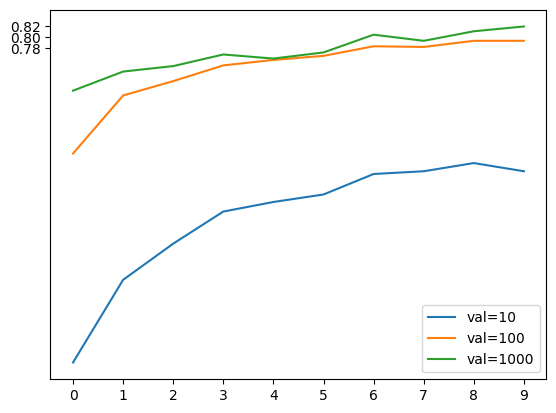

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82])
plt.legend()

# Regularization and Dropout

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(102)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
# The downside of dropout is that you’ll need more iterations to learn something. Therefor we change the value from 10 to 30.
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 36s 139ms/step - accuracy: 0.2571 - loss: 3.4510 - val_accuracy: 0.6215 - val_loss: 1.5701
Epoch 2/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.6970 - loss: 1.2327 - val_accuracy: 0.6813 - val_loss: 1.2271
Epoch 3/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.8050 - loss: 0.7632 - val_accuracy: 0.7265 - val_loss: 1.0303
Epoch 4/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.8609 - loss: 0.5484 - val_accuracy: 0.7399 - val_loss: 0.9912
Epoch 5/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9057 - loss: 0.4112 - val_accuracy: 0.7595 - val_loss: 0.9010
Epoch 6/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.9217 - loss: 0.3270 - val_accuracy: 0.7717 - val_loss: 0.8334
Epoch 7/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.9507 - loss: 0.2337 - val_accuracy: 0.7717 - val_loss: 0.8905
Epoch 8/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9667 - los

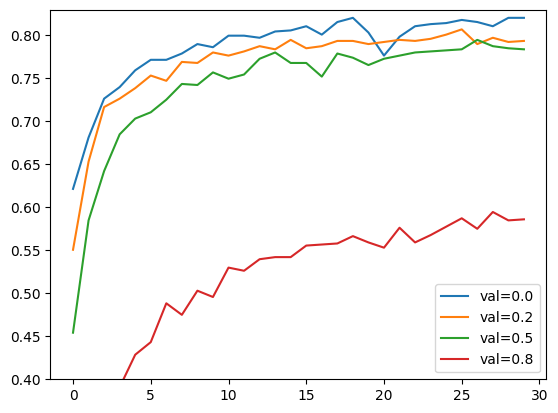

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.40, 0.83)
plt.legend()

La conclusion es que no hace falta implemetar dropout. La performance no mejora en nada.

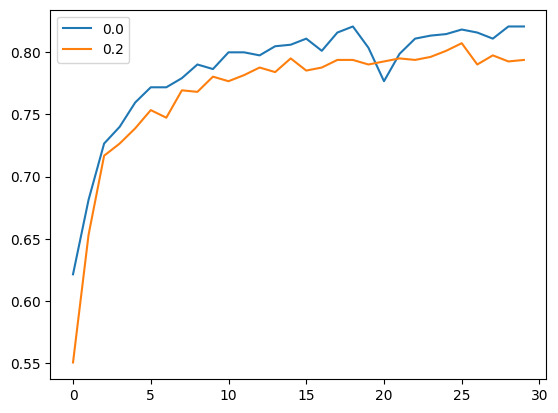

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()

# Training a model with augmentations

In [ ]:
# rotation_range=30,
# width_shift_range=10,
# height_shift_range=10,
# shear_range=10,
# zoom_range=0.3,
# cval=0.0,
# horizontal_flip=True,
# vertical_flip=True,


train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    zoom_range=0.3,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    '/content/split_dataset_by_class/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/content/split_dataset_by_class/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 6551 images belonging to 102 classes.
Found 819 images belonging to 102 classes.


In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.0

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 70s 305ms/step - accuracy: 0.2153 - loss: 3.6258 - val_accuracy: 0.5568 - val_loss: 1.7957
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 57s 276ms/step - accuracy: 0.5781 - loss: 1.6676 - val_accuracy: 0.6496 - val_loss: 1.3241
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 56s 274ms/step - accuracy: 0.6743 - loss: 1.2472 - val_accuracy: 0.7094 - val_loss: 1.1534
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 56s 275ms/step - accuracy: 0.7182 - loss: 1.0392 - val_accuracy: 0.7228 - val_loss: 1.0892
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 58s 283ms/step - accuracy: 0.7475 - loss: 0.9087 - val_accuracy: 0.7204 - val_loss: 1.0392
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 56s 275ms/step - accuracy: 0.7668 - loss: 0.8358 - val_accuracy: 0.7448 - val_loss: 0.9160
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 56s 271ms/step - accuracy: 0.7946 - loss: 0.7399 - val_accuracy: 0.7546 - val_loss: 0.8945
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 55s 268ms/step - accuracy: 0.8054 - loss: 0

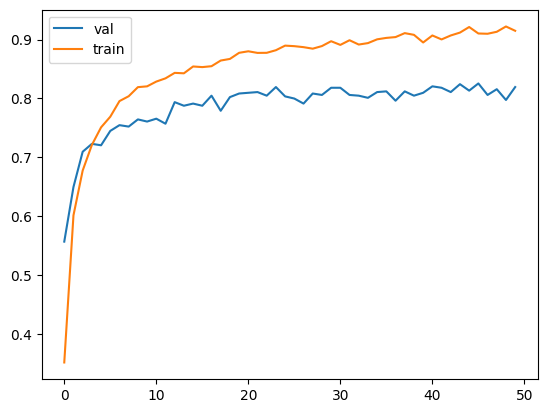

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

There is an inprovement 20 epoch, then seems to start overfiting (the val accuracy stays constant from epoch > 20)

# Train a 299×299 model

In [10]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(102)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [11]:
input_size = 299

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    zoom_range=0.3,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    '/content/split_dataset_by_class/train',
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    '/content/split_dataset_by_class/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)


Found 6551 images belonging to 102 classes.
Found 819 images belonging to 102 classes.


In [12]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [13]:
learning_rate = 0.001
size = 100
droprate = 0.0

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 36/205 ━━━━━━━━━━━━━━━━━━━━ 45:44 16s/step - accuracy: 0.0379 - loss: 4.5204

KeyboardInterrupt: 